In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import pandas as pd

In [5]:
cIn = pd.read_excel("/kaggle/input/rf-eddy-analysis-data/Climate-Index.xlsx")
cIn



,time,ONI,DMI
0,1993-01-31,0.2,-0.131
1,1993-02-28,0.3,0.115
2,1993-03-31,0.5,-0.195
3,1993-04-30,0.7,-0.106
4,1993-05-31,0.8,0.053
...,...,...,...
343,2021-08-31,-0.5,0.014
344,2021-09-30,-0.7,0.048
345,2021-10-31,-0.8,0.068
346,2021-11-30,-1.0,0.192


In [6]:
pIODy = cIn[cIn.ONI.values>=0.4].time.values
nIODy = cIn[cIn.ONI.values<=-0.4].time.values

pIODy, nIODy

(array(['1993-03-31T00:00:00.000000000', '1993-04-30T00:00:00.000000000',
        '1993-05-31T00:00:00.000000000', '1993-06-30T00:00:00.000000000',
        '1994-05-31T00:00:00.000000000', '1994-06-30T00:00:00.000000000',
        '1994-07-31T00:00:00.000000000', '1994-08-31T00:00:00.000000000',
        '1994-09-30T00:00:00.000000000', '1994-10-31T00:00:00.000000000',
        '1994-11-30T00:00:00.000000000', '1994-12-31T00:00:00.000000000',
        '1995-01-31T00:00:00.000000000', '1995-02-28T00:00:00.000000000',
        '1995-03-31T00:00:00.000000000', '1997-05-31T00:00:00.000000000',
        '1997-06-30T00:00:00.000000000', '1997-07-31T00:00:00.000000000',
        '1997-08-31T00:00:00.000000000', '1997-09-30T00:00:00.000000000',
        '1997-10-31T00:00:00.000000000', '1997-11-30T00:00:00.000000000',
        '1997-12-31T00:00:00.000000000', '1998-01-31T00:00:00.000000000',
        '1998-02-28T00:00:00.000000000', '1998-03-31T00:00:00.000000000',
        '1998-04-30T00:00:00.000000000

In [7]:
cIn["year"] = [int(str(i)[:4]) for i in cIn.time.values]
year = list(set(list(cIn.year.values)))
m1iod = [cIn[cIn.year.values == i] for i in year]

mONI = [np.nanmean(i.ONI.values) for i in m1iod]
mDMI = [np.nanmean(i.DMI.values) for i in m1iod]

mcIn = pd.DataFrame({"time":year,"ONI":mONI,"DMI":mDMI})

mcIn.to_csv("/kaggle/working/AnnualMeanClimateIndex.csv")

mcIn

,time,ONI,DMI
0,1993,0.350000,-0.060667
1,1994,0.433333,0.478583
2,1995,-0.133333,-0.015083
3,1996,-0.425000,-0.361667
4,1997,1.041667,0.518333
5,1998,-0.008333,-0.065500
6,1999,-1.141667,0.034250
7,2000,-0.866667,0.069500
8,2001,-0.300000,-0.023833
9,2002,0.583333,0.020000


In [8]:
mpIODy = mcIn[mcIn.ONI.values>=0.4].time.values
mnIODy = mcIn[mcIn.ONI.values<=-0.4].time.values

nIODy_ = mcIn[mcIn.ONI.values<0.4]
nIODy = nIODy_[nIODy_.ONI.values>-0.4].time.values



mpIODy, mnIODy, nIODy

(array([1994, 1997, 2002, 2004, 2015, 2019]),
 array([1996, 1999, 2000, 2007, 2008, 2011, 2021]),
 array([1993, 1995, 1998, 2001, 2003, 2005, 2006, 2009, 2010, 2012, 2013,
        2014, 2016, 2017, 2018, 2020]))

In [9]:
sst = pd.read_csv("/kaggle/input/rf-eddy-analysis-data/sst_sstAnom.csv")

acNC=  xr.open_dataset("/kaggle/input/rf-eddy-analysis-data/ac2.nc")
ceNC= xr.open_dataset("/kaggle/input/rf-eddy-analysis-data/ce2.nc")

sst

,time,lon,lat,sst,anom
0,1993-01-16 12:00:00,78.125,0.125,28.043870,-0.507419
1,1993-02-15 00:00:00,78.125,0.125,28.618570,-0.221429
2,1993-03-16 12:00:00,78.125,0.125,29.241611,-0.031290
3,1993-04-16 00:00:00,78.125,0.125,29.388666,-0.116333
4,1993-05-16 12:00:00,78.125,0.125,29.313225,-0.062258
...,...,...,...,...,...
243355,2022-08-16 12:00:00,103.125,25.125,NaN,NaN
243356,2022-09-16 00:00:00,103.125,25.125,NaN,NaN
243357,2022-10-16 12:00:00,103.125,25.125,NaN,NaN
243358,2022-11-16 00:00:00,103.125,25.125,NaN,NaN


<Axes: xlabel='lon', ylabel='lat'>

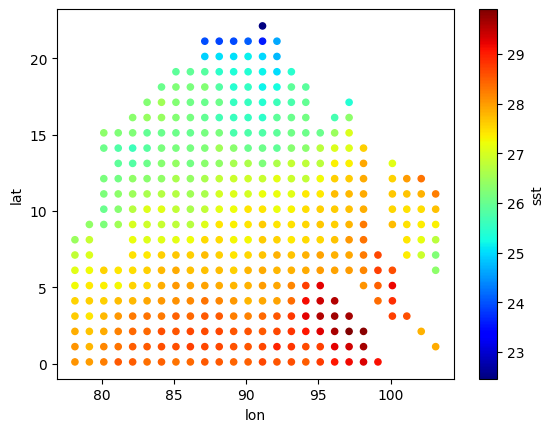

In [10]:
sst[sst.time.values == sst.time.values[0]].plot(kind = "scatter", 
                                               x = "lon", y = "lat",
                                               c = "sst", cmap = "jet")

In [11]:
sst["ym"] = [str(i)[:5]+str(int(str(i)[5:7])) for i in sst.time.values]

lat_ = np.arange(0.125,26.125)
lon_ = np.arange(78.125,104.125)

lat = np.hstack(np.array([lat_ for i in lon_]))
lon = np.hstack(np.array([np.array([j for i in lat_]) for j in lon_]))

df2 = []
for i in range(1993,2023):
    df1 = [sst[sst.ym.values == str(i)+"-"+str(j)] for j in range(1,13)]
    sst11 = np.nansum(np.array([k.sst.values for k in df1]), axis =0)/12
    sst11[sst11==0] = np.nan
    anom11 = np.nansum(np.array([k.anom.values for k in df1]), axis =0)/12
    anom11[anom11==0] = np.nan
    time11 = np.array([i for k in range(len(sst11))])
    
    df2.append(pd.DataFrame({"time":time11,"lon":lon,"lat":lat,
                            "sst":sst11,"anom":anom11}))
    print(i)
    
df3 = pd.concat(df2)
df3.to_csv("/kaggle/working/annualMeanSSTanomaly.csv")
    
sstA = df3.copy()
sstA

1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


,time,lon,lat,sst,anom
0,1993,78.125,0.125,28.635954,-0.191934
1,1993,78.125,1.125,28.547505,-0.265796
2,1993,78.125,2.125,28.468140,-0.284263
3,1993,78.125,3.125,28.378579,-0.278445
4,1993,78.125,4.125,28.248593,-0.272080
...,...,...,...,...,...
671,2022,103.125,21.125,NaN,NaN
672,2022,103.125,22.125,NaN,NaN
673,2022,103.125,23.125,NaN,NaN
674,2022,103.125,24.125,NaN,NaN


In [12]:
sstA[sstA.time.values == sstA.time.values[0]]

,time,lon,lat,sst,anom
0,1993,78.125,0.125,28.635954,-0.191934
1,1993,78.125,1.125,28.547505,-0.265796
2,1993,78.125,2.125,28.468140,-0.284263
3,1993,78.125,3.125,28.378579,-0.278445
4,1993,78.125,4.125,28.248593,-0.272080
...,...,...,...,...,...
671,1993,103.125,21.125,NaN,NaN
672,1993,103.125,22.125,NaN,NaN
673,1993,103.125,23.125,NaN,NaN
674,1993,103.125,24.125,NaN,NaN


<Axes: xlabel='lon', ylabel='lat'>

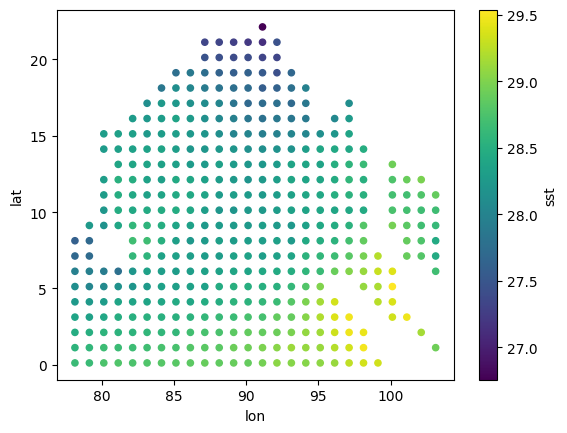

In [13]:
df3[df3.time.values==1993].plot(kind = "scatter", x = "lon",
                               y = "lat", c = "sst")

In [14]:
acNC

<xarray.Dataset> Size: 163kB
Dimensions:    (y: 26, x: 26, year: 30)
Coordinates:
  * year       (year) float32 120B 1.993e+03 1.994e+03 ... 2.021e+03 2.022e+03
Dimensions without coordinates: y, x
Data variables:
    amplitude  (y, x, year) float32 81kB ...
    radius     (y, x, year) float32 81kB ...
    lat        (y) float32 104B ...
    lon        (x) float32 104B ...

In [15]:
ceNC

<xarray.Dataset> Size: 163kB
Dimensions:    (y: 26, x: 26, year: 30)
Coordinates:
  * year       (year) float32 120B 1.993e+03 1.994e+03 ... 2.021e+03 2.022e+03
Dimensions without coordinates: y, x
Data variables:
    amplitude  (y, x, year) float32 81kB ...
    radius     (y, x, year) float32 81kB ...
    lat        (y) float32 104B ...
    lon        (x) float32 104B ...

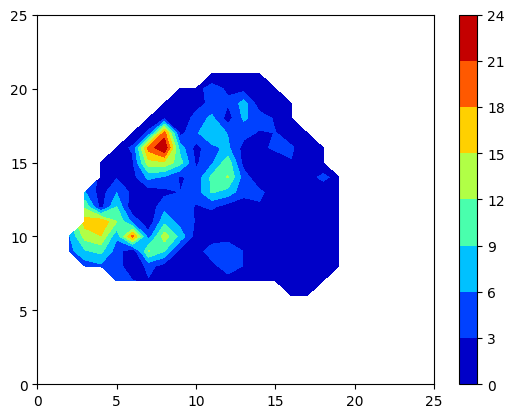

In [16]:
m = plt.contourf(acNC.amplitude.values[:,:,0], cmap = "jet")
plt.colorbar(m)

In [17]:
acAm_ = acNC.amplitude.values
acR_ = acNC.radius.values
lat_ = acNC.lat.values
lon_ = acNC.lon.values

acAm = np.zeros(26*26*30)
acR = acAm.copy()
time = acR.copy()
lat = time.copy()
lon = lat.copy()

year_ = np.arange(1993,2023)


s = 0
for j in range(len(acNC.lat.values)):
    for i in range(len(acNC.lon.values)):
        for t in range(len(year_)):
            acAm[s] = acAm_[j,i,t]
            acR[s] = acR_[j,i,t]
            lat[s] = acNC.lat.values[j]
            lon[s] = acNC.lon.values[i]
            time[s] = year_[t]
            s+=1
   
    

ac  = pd.DataFrame({"time":time,"lon":lon,"lat":lat,"amplitude":acAm,
                   "radius":acR})

setLon = list(set(list(lon)))

setTime = list(set(list(ac.time.values)))

act2 = []
for j in setTime:
    act1 = ac[ac.time.values== j]

    act2.append(pd.concat([act1[act1.lon.values==i] for i in setLon]))

ac = pd.concat(act2)

ac.to_csv("/kaggle/working/ac.csv")

ac

,time,lon,lat,amplitude,radius
0,1993.0,78.125,0.125,NaN,NaN
780,1993.0,78.125,1.125,NaN,NaN
1560,1993.0,78.125,2.125,NaN,NaN
2340,1993.0,78.125,3.125,NaN,NaN
3120,1993.0,78.125,4.125,NaN,NaN
...,...,...,...,...,...
17159,2022.0,103.125,21.125,NaN,NaN
17939,2022.0,103.125,22.125,NaN,NaN
18719,2022.0,103.125,23.125,NaN,NaN
19499,2022.0,103.125,24.125,NaN,NaN


In [18]:
ac[ac.time.values == 2010]

,time,lon,lat,amplitude,radius
17,2010.0,78.125,0.125,NaN,NaN
797,2010.0,78.125,1.125,NaN,NaN
1577,2010.0,78.125,2.125,NaN,NaN
2357,2010.0,78.125,3.125,NaN,NaN
3137,2010.0,78.125,4.125,NaN,NaN
...,...,...,...,...,...
17147,2010.0,103.125,21.125,NaN,NaN
17927,2010.0,103.125,22.125,NaN,NaN
18707,2010.0,103.125,23.125,NaN,NaN
19487,2010.0,103.125,24.125,NaN,NaN


In [19]:
ceAm_ = ceNC.amplitude.values
ceR_ = ceNC.radius.values
lat_ = ceNC.lat.values
lon_ = ceNC.lon.values

ceAm = np.zeros(26*26*30)
ceR = ceAm.copy()
time = ceR.copy()
lat = time.copy()
lon = lat.copy()

year_ = np.arange(1993,2023)


s = 0

for j in range(len(ceNC.lat.values)):
    for i in range(len(ceNC.lon.values)):
        for t in range(len(year_)):
        
            ceAm[s] = ceAm_[j,i,t]
            ceR[s] = ceR_[j,i,t]
            lat[s] = ceNC.lat.values[j]
            lon[s] = ceNC.lon.values[i]
            time[s] = year_[t]
            s+=1
    
    

ce  = pd.DataFrame({"time":time,"lon":lon,"lat":lat,"amplitude":ceAm,
                   "radius":ceR})

setLon = list(set(list(lon)))

setTime = list(set(list(ce.time.values)))

cet2 = []
for j in setTime:
    cet1 = ce[ce.time.values== j]

    cet2.append(pd.concat([cet1[cet1.lon.values==i] for i in setLon]))

ce = pd.concat(cet2)

ce.to_csv("/kaggle/working/ce.csv") 

ce

,time,lon,lat,amplitude,radius
0,1993.0,78.125,0.125,NaN,NaN
780,1993.0,78.125,1.125,NaN,NaN
1560,1993.0,78.125,2.125,NaN,NaN
2340,1993.0,78.125,3.125,NaN,NaN
3120,1993.0,78.125,4.125,NaN,NaN
...,...,...,...,...,...
17159,2022.0,103.125,21.125,NaN,NaN
17939,2022.0,103.125,22.125,NaN,NaN
18719,2022.0,103.125,23.125,NaN,NaN
19499,2022.0,103.125,24.125,NaN,NaN


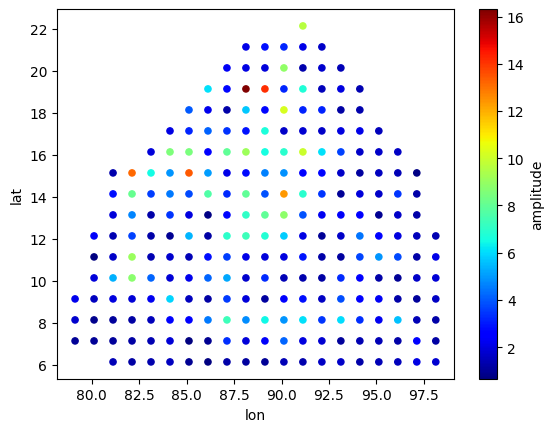

<Axes: xlabel='lon', ylabel='lat'>

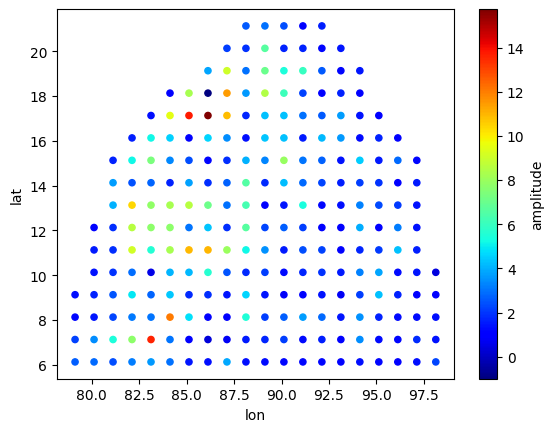

In [20]:
ac[ac.time.values==2022].plot(kind = "scatter",x = "lon", y = "lat",
                             c = "amplitude", cmap = "jet")
plt.show()

ce[ce.time.values==2022].plot(kind = "scatter",x = "lon", y = "lat",
                             c = "amplitude", cmap = "jet")

In [21]:
# Code validation
print(ac.time.values== sstA.time.values)
print(ac.time.values==ce.time.values)

print(ac.lon.values == sstA.lon.values)
print(ac.lon.values == ce.lon.values)

print(ac.lat.values == sstA.lat.values)
print(ac.lat.values == ce.lat.values) 
# Code validation test has been passed

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]


In [22]:
dic = {"time":sstA.time.values,
      "lon":ac.lon.values,
      "lat":ce.lat.values,
      "ac_amplitude":ac.amplitude.values,
      "ce_amplitude":ce.amplitude.values,
      "ac_radius":ac.radius.values,
      "ce_radius":ce.radius.values,
      "sst":sstA.sst.values,
      "sst_anomaly":sstA.anom.values}

rfData = pd.DataFrame(dic)
#rfData.dropna(inplace = True)

rfData.to_csv("/kaggle/working/rfData.csv")

rfData

,time,lon,lat,ac_amplitude,ce_amplitude,ac_radius,ce_radius,sst,sst_anomaly
0,1993,78.125,0.125,NaN,NaN,NaN,NaN,28.635954,-0.191934
1,1993,78.125,1.125,NaN,NaN,NaN,NaN,28.547505,-0.265796
2,1993,78.125,2.125,NaN,NaN,NaN,NaN,28.468140,-0.284263
3,1993,78.125,3.125,NaN,NaN,NaN,NaN,28.378579,-0.278445
4,1993,78.125,4.125,NaN,NaN,NaN,NaN,28.248593,-0.272080
...,...,...,...,...,...,...,...,...,...
20275,2022,103.125,21.125,NaN,NaN,NaN,NaN,NaN,NaN
20276,2022,103.125,22.125,NaN,NaN,NaN,NaN,NaN,NaN
20277,2022,103.125,23.125,NaN,NaN,NaN,NaN,NaN,NaN
20278,2022,103.125,24.125,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import pandas as pd

In [24]:
data = pd.read_csv("/kaggle/input/rf-data-with-nan/rfData.csv")
data.drop("Unnamed: 0", axis = 1,inplace = True)
data

,time,lon,lat,ac_amplitude,ce_amplitude,ac_radius,ce_radius,sst,sst_anomaly
0,1993,78.125,0.125,NaN,NaN,NaN,NaN,28.635954,-0.191934
1,1993,78.125,1.125,NaN,NaN,NaN,NaN,28.547505,-0.265796
2,1993,78.125,2.125,NaN,NaN,NaN,NaN,28.468140,-0.284263
3,1993,78.125,3.125,NaN,NaN,NaN,NaN,28.378579,-0.278445
4,1993,78.125,4.125,NaN,NaN,NaN,NaN,28.248593,-0.272080
...,...,...,...,...,...,...,...,...,...
20275,2022,103.125,21.125,NaN,NaN,NaN,NaN,NaN,NaN
20276,2022,103.125,22.125,NaN,NaN,NaN,NaN,NaN,NaN
20277,2022,103.125,23.125,NaN,NaN,NaN,NaN,NaN,NaN
20278,2022,103.125,24.125,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Max time repeat
time = np.array(list(set(list(data.time.values))))
time_ = list(data.time.values)

cnt = []
for i in time:
    cnt.append(time_.count(i))

time[cnt.index(max(cnt))], max(cnt)

(1993, 676)

In [26]:
elnino = np.array([1994, 1997, 2002, 2004, 2006, 2009, 2015])
lanina = np.array([1995, 1998, 1999, 2000, 2010, 2011])

pIOD = np.array([1994, 1997, 2002, 2004, 2015, 2019])
nIOD = np.array([1996, 1999, 2000, 2007, 2008, 2011])

neutral,elninoPiod,elninoNiod,laninaPiod,laninaNiod,Uelnino,Ulanina,Upiod,Uniod = [],[],[],[],[],[],[],[],[]
for i in range(1993,2021):
    if i not in elnino and i not in lanina and i not in pIOD and i not in nIOD:
        neutral.append(i)
    elif i in elnino and i not in lanina and i in pIOD and i not in nIOD:
        elninoPiod.append(i)
    elif i in elnino and i not in lanina and i not in pIOD and i in nIOD:
        elninoNiod.append(i)
    elif i not in elnino and i in lanina and i in pIOD and i not in nIOD:
        laninaPiod.append(i)
    elif i not in elnino and i in lanina and i not in pIOD and i in nIOD:
        laninaNiod.append(i)
    elif i in elnino and i not in lanina and i not in pIOD and i not in nIOD:
        Uelnino.append(i)
    elif i not in elnino and i in lanina and i not in pIOD and i not in nIOD:
        Ulanina.append(i)
    elif i not in elnino and i not in lanina and i in pIOD and i not in nIOD:
        Upiod.append(i)
    elif i not in elnino and i not in lanina and i not in pIOD and i not in nIOD:
        Uniod.append(i)
        
        
neutral,elninoPiod,elninoNiod,laninaPiod,laninaNiod,Uelnino,Ulanina,Upiod,Uniod



([1993, 2001, 2003, 2005, 2012, 2013, 2014, 2016, 2017, 2018, 2020],
 [1994, 1997, 2002, 2004, 2015],
 [],
 [],
 [1999, 2000, 2011],
 [2006, 2009],
 [1995, 1998, 2010],
 [2019],
 [])

In [51]:
neutral,elninoPiod,laninaNiod,Uelnino,Ulanina,Upiod

([1993, 2001, 2003, 2005, 2012, 2013, 2014, 2016, 2017, 2018, 2020],
 [1994, 1997, 2002, 2004, 2015],
 [1999, 2000, 2011],
 [2006, 2009],
 [1995, 1998, 2010],
 [2019])

In [63]:
lon = data[data.time.values == 1993].lon.values
lat = data[data.time.values == 1993].lat.values
classTime = neutral,elninoPiod,laninaNiod,Uelnino,Ulanina,Upiod

classT_ = ["neutral","elninoPiod","laninaNiod","Uelnino","Ulanina","Upiod"]
fields = data.columns[3:]

def class_(classi):
    ni = classT_[classi]
   
    dt = []
    for i in classTime[classi]:
        dt_ = data[data.time.values == i]    
        mdt = [dt_[k].values for k in fields]
        dt.append(np.array(mdt))
    dt = np.nanmean(np.array(dt),axis = 0)
  
    dic = {"lon":lon,"lat":lat}
    for i in range(len(fields)):
        dic[fields[i]] = dt[i]
    dt = pd.DataFrame(dic)
    dt.dropna(inplace = True)
    dt.to_csv("/kaggle/working/{}.csv".format(ni))
    
    return dt

df = [class_(j) for j in range(len(classT_))]
df[0]

/tmp/ipykernel_147/1576278954.py:16: RuntimeWarning: Mean of empty slice
  dt = np.nanmean(np.array(dt),axis = 0)
/tmp/ipykernel_147/1576278954.py:16: RuntimeWarning: Mean of empty slice
  dt = np.nanmean(np.array(dt),axis = 0)
/tmp/ipykernel_147/1576278954.py:16: RuntimeWarning: Mean of empty slice
  dt = np.nanmean(np.array(dt),axis = 0)
/tmp/ipykernel_147/1576278954.py:16: RuntimeWarning: Mean of empty slice
  dt = np.nanmean(np.array(dt),axis = 0)
/tmp/ipykernel_147/1576278954.py:16: RuntimeWarning: Mean of empty slice
  dt = np.nanmean(np.array(dt),axis = 0)
/tmp/ipykernel_147/1576278954.py:16: RuntimeWarning: Mean of empty slice
  dt = np.nanmean(np.array(dt),axis = 0)


,lon,lat,ac_amplitude,ce_amplitude,ac_radius,ce_radius,sst,sst_anomaly
32,79.125,6.125,2.701137,1.310740,81.442055,63.896782,26.207851,2.444391
33,79.125,7.125,1.375480,1.175925,63.563044,55.789385,26.007871,2.349747
34,79.125,8.125,1.255050,1.323081,46.830287,44.778691,25.973611,2.341817
35,79.125,9.125,1.252184,1.444766,37.589602,44.179008,26.471674,2.732923
58,80.125,6.125,1.473811,1.656192,59.520502,65.834731,26.106849,2.198500
...,...,...,...,...,...,...,...,...
526,98.125,6.125,1.921984,1.865570,77.971130,71.508729,27.189788,2.599711
527,98.125,7.125,1.467038,1.667854,61.627287,64.147033,27.008754,2.486097
528,98.125,8.125,1.518171,1.357685,49.008820,59.742586,26.867459,2.409253
529,98.125,9.125,1.529168,1.331153,43.212473,46.874666,26.829598,2.448476


In [66]:
df[3]

,lon,lat,ac_amplitude,ce_amplitude,ac_radius,ce_radius,sst,sst_anomaly
32,79.125,6.125,1.340023,1.271059,76.628990,60.539497,28.322897,0.210482
33,79.125,7.125,1.242151,1.316013,66.110306,59.502172,28.064685,0.085591
34,79.125,8.125,1.215508,1.537321,53.964220,49.700680,28.017181,0.061249
35,79.125,9.125,1.307442,1.359915,38.352184,40.042904,28.563485,0.436626
58,80.125,6.125,0.729354,1.445437,50.985977,62.438740,28.284902,0.031643
...,...,...,...,...,...,...,...,...
507,97.125,13.125,1.808192,1.352474,71.737446,55.099850,28.774579,0.075206
508,97.125,14.125,1.490093,1.174866,59.634455,57.459375,28.759739,0.100912
509,97.125,15.125,1.687820,1.564021,51.447287,41.029432,28.717167,0.109272
529,98.125,9.125,1.462656,1.482527,40.718113,45.622856,29.049571,0.209162


## 